Se importa pandas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons, make_classification



In [6]:
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
original_df = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


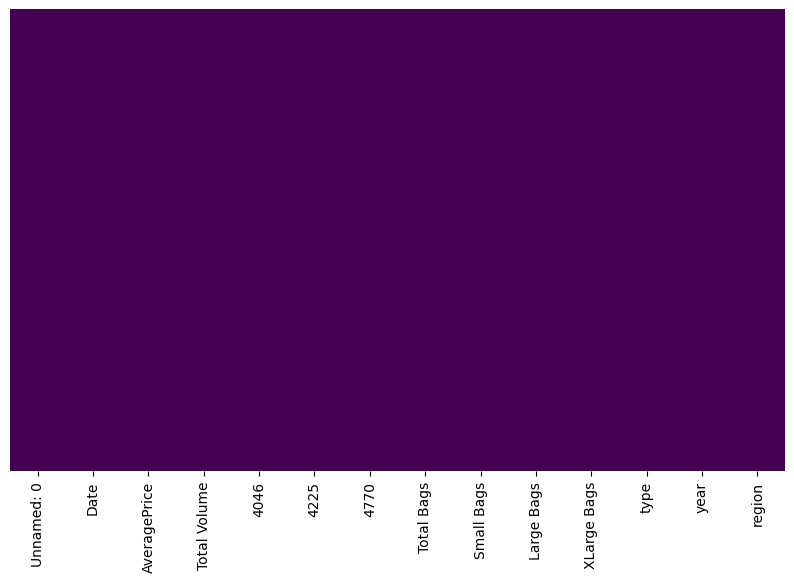

In [9]:
# Visualización de valores nulos
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

In [10]:
#cambio de nombre de columna Unnamed: 0 a index
df.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


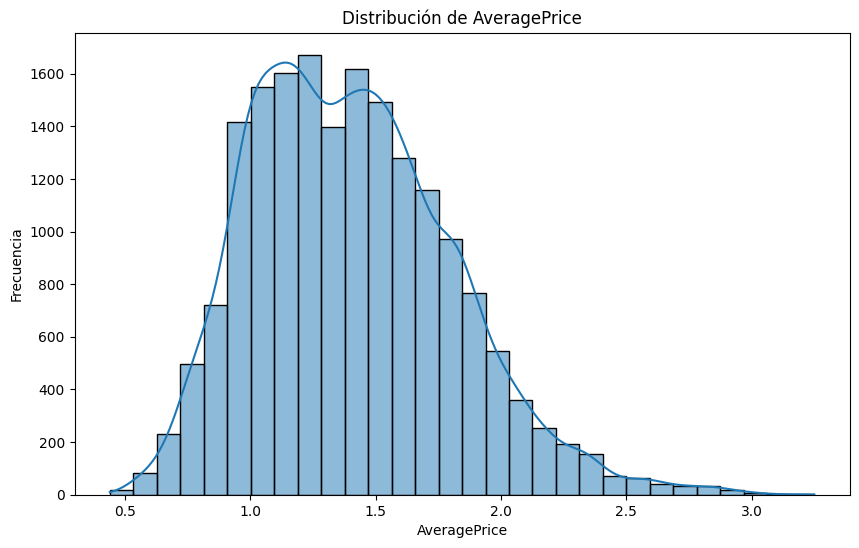

In [11]:
# Histograma de la variable 'AveragePrice'
plt.figure(figsize=(10,6))
sns.histplot(df['AveragePrice'], bins=30, kde=True)
plt.title('Distribución de AveragePrice')
plt.xlabel('AveragePrice')
plt.ylabel('Frecuencia')
plt.show()

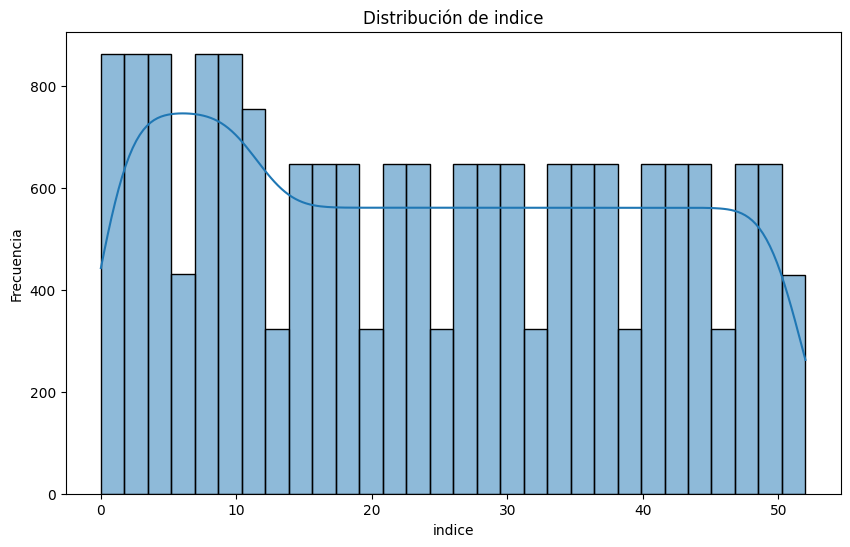

In [12]:
# Histograma de la variable 'indice'
plt.figure(figsize=(10,6))
sns.histplot(df['index'], bins=30, kde=True)
plt.title('Distribución de indice')
plt.xlabel('indice')
plt.ylabel('Frecuencia')
plt.show()

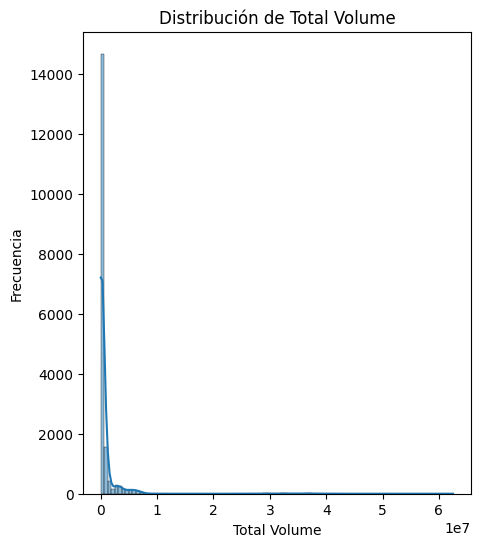

In [13]:
# Histograma de la variable 'total Volume'
plt.figure(figsize=(5,6))
sns.histplot(df['Total Volume'], bins=100, kde=True)
plt.title('Distribución de Total Volume')
plt.xlabel('Total Volume')
plt.ylabel('Frecuencia')
plt.show()


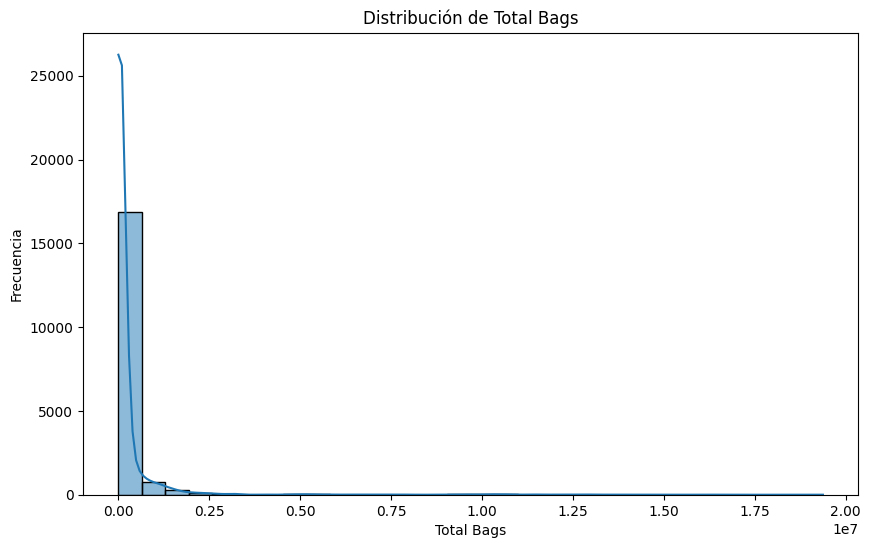

In [14]:
# Histograma de la variable 'Total Bags'
plt.figure(figsize=(10,6))
sns.histplot(df['Total Bags'], bins=30, kde=True)
plt.title('Distribución de Total Bags')
plt.xlabel('Total Bags')
plt.ylabel('Frecuencia')
plt.show()

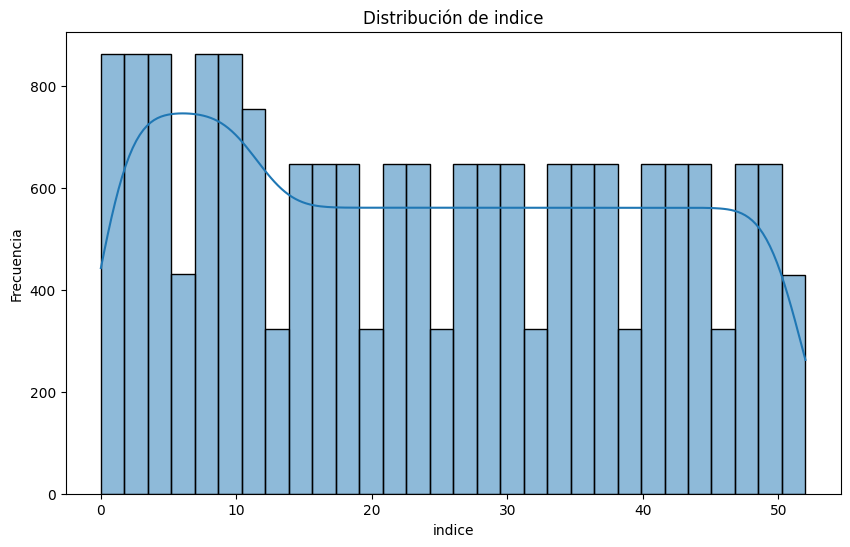

In [15]:
# Histograma de la variable 'indice'
plt.figure(figsize=(10,6))
sns.histplot(df['index'], bins=30, kde=True)
plt.title('Distribución de indice')
plt.xlabel('indice')
plt.ylabel('Frecuencia')
plt.show()

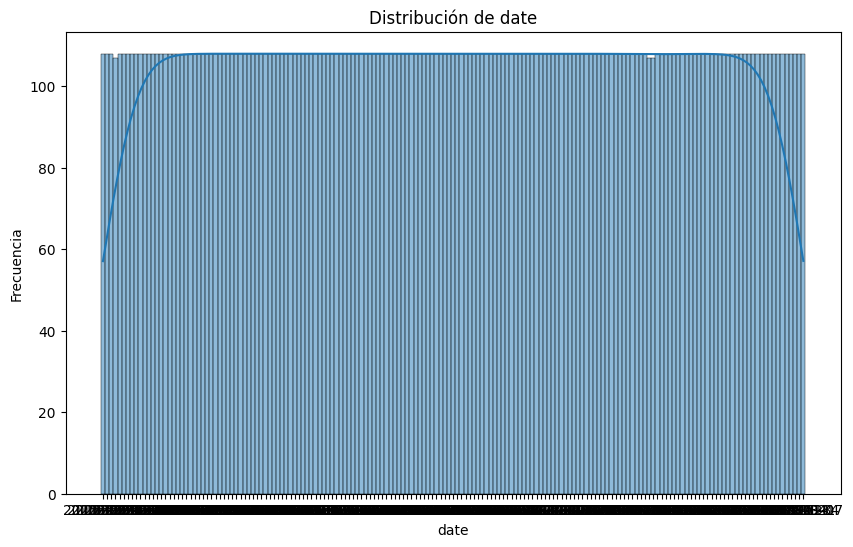

In [16]:
# Histograma de la variable 'date'
plt.figure(figsize=(10,6))
sns.histplot(df['Date'], bins=10, kde=True)
plt.title('Distribución de date')
plt.xlabel('date')
plt.ylabel('Frecuencia')
plt.show()

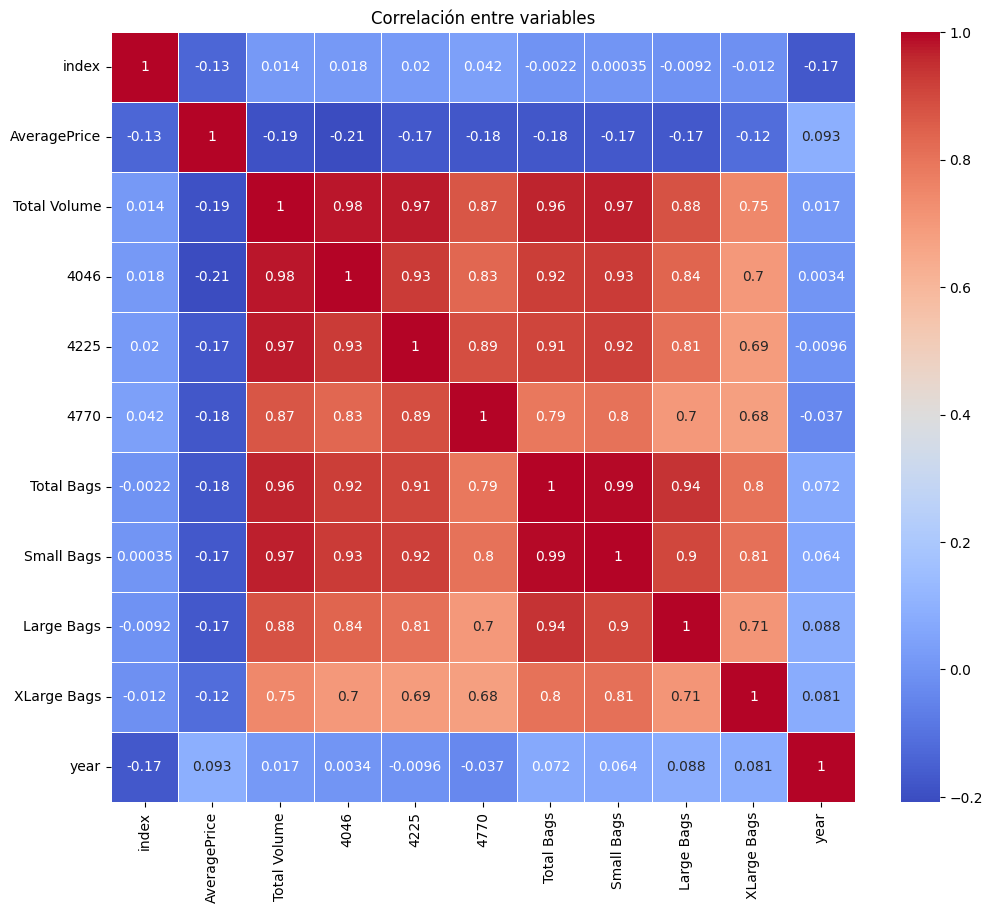

In [17]:
#correlación entre variables
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación entre variables')
plt.show()

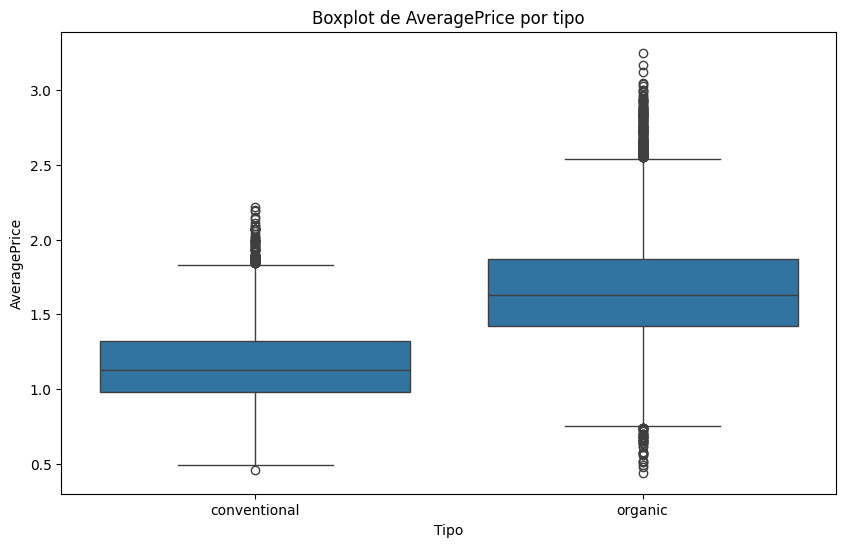

In [18]:
#boxplot de type y AveragePrice
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='AveragePrice', data=df)
plt.title('Boxplot de AveragePrice por tipo')
plt.xlabel('Tipo')
plt.ylabel('AveragePrice')
plt.show()

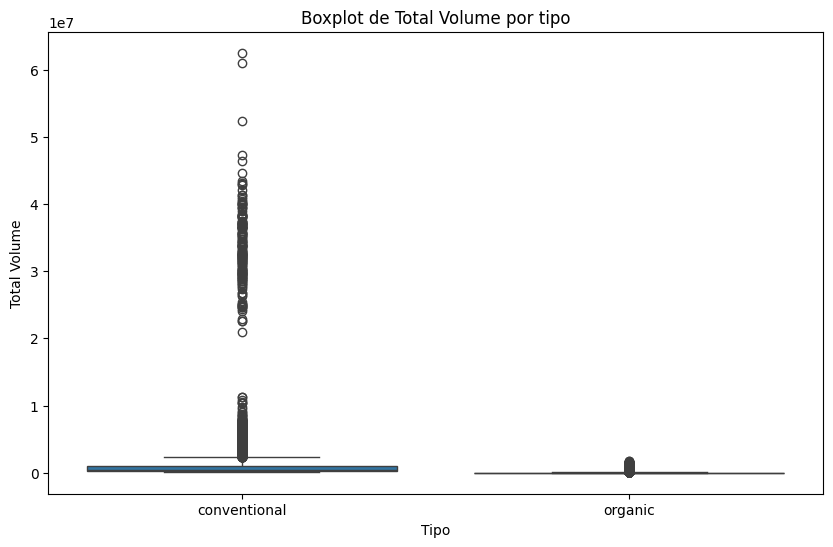

In [19]:
#boxplot de type y total volume
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='Total Volume', data=df)
plt.title('Boxplot de Total Volume por tipo')
plt.xlabel('Tipo')
plt.ylabel('Total Volume')
plt.show()

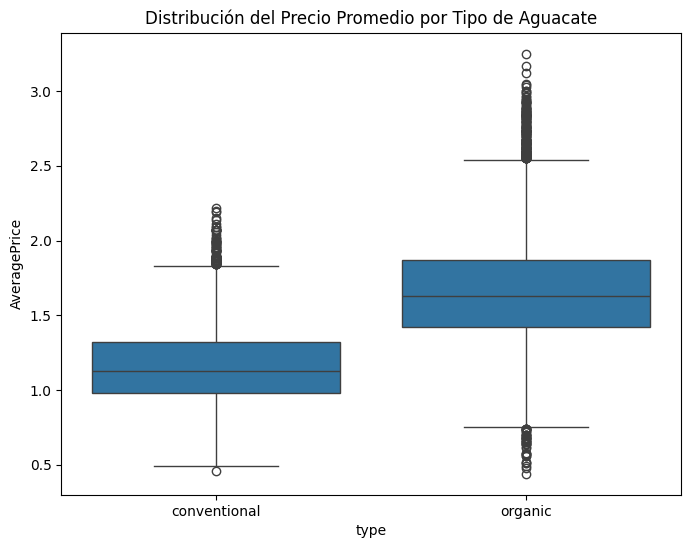

In [20]:
#boxplot de type y precio promedio
plt.figure(figsize=(8, 6))
sns.boxplot(x="type", y="AveragePrice", data=df)
plt.title("Distribución del Precio Promedio por Tipo de Aguacate")
plt.show()

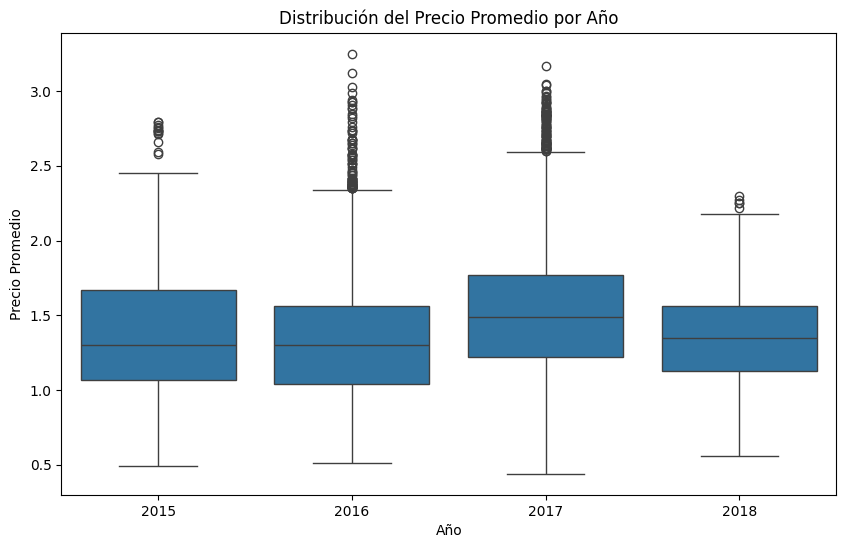

In [21]:
# boxplot de region y año
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y="AveragePrice", data=df)
plt.title("Distribución del Precio Promedio por Año")
plt.xlabel("Año")
plt.ylabel("Precio Promedio")
plt.show()


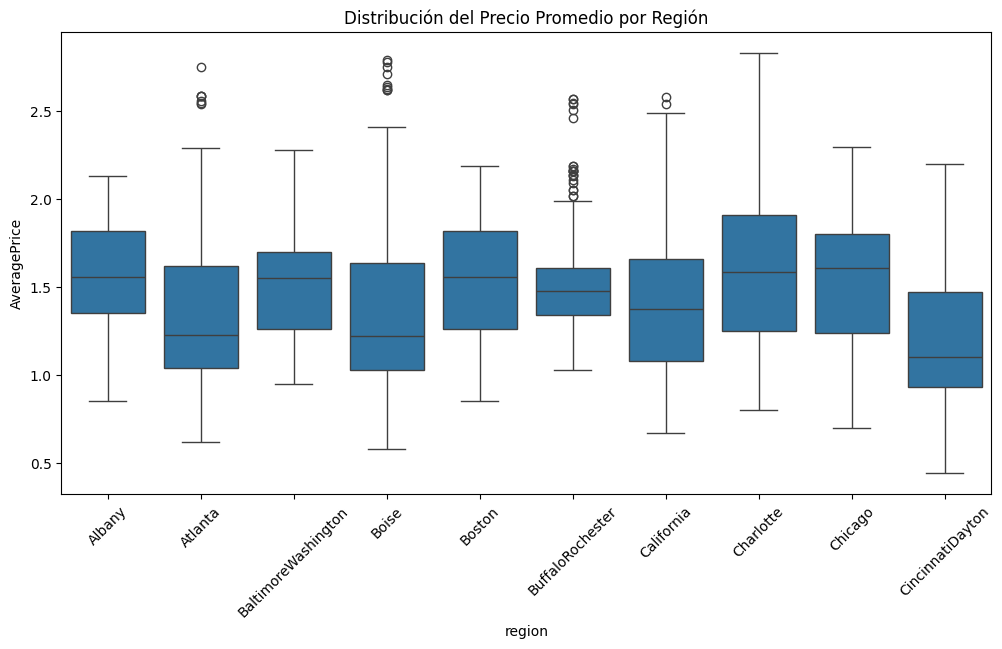

In [22]:
# boxplot de region y precio promedio
regiones_seleccionadas = df["region"].value_counts().index[:10]  # Tomar las 10 regiones con más datos
df_filtrado = df[df["region"].isin(regiones_seleccionadas)]

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filtrado["region"], y=df_filtrado["AveragePrice"])
plt.xticks(rotation=45)
plt.title("Distribución del Precio Promedio por Región")
plt.show()

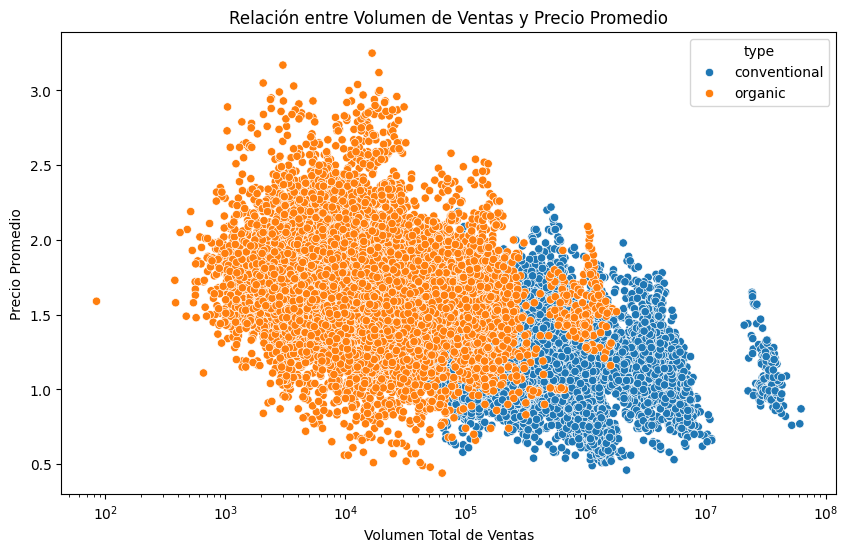

In [23]:
#scatterplot de total volume, precio promedio y tipo
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Total Volume"], y=df["AveragePrice"], hue=df["type"])
plt.xscale("log")  # Escala logarítmica para mejor visualización
plt.title("Relación entre Volumen de Ventas y Precio Promedio")
plt.xlabel("Volumen Total de Ventas")
plt.ylabel("Precio Promedio")
plt.show()


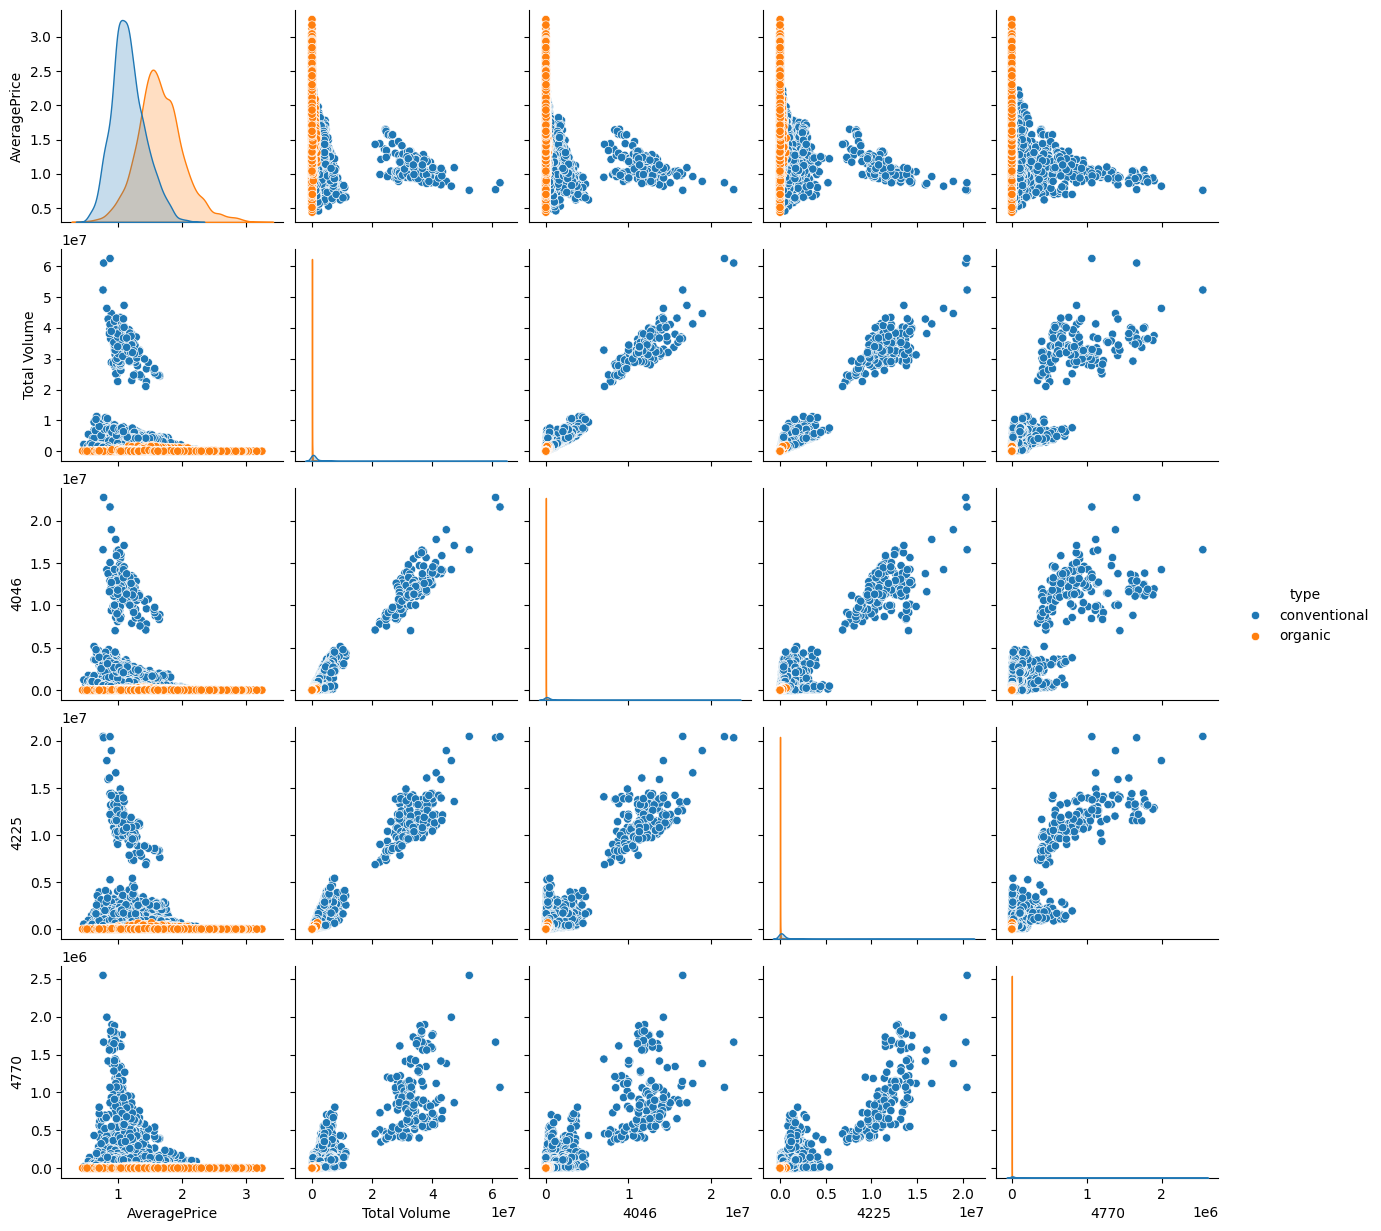

In [24]:

# Seleccionamos columnas numéricas relevantes
columnas_seleccionadas = ["AveragePrice", "Total Volume", "4046", "4225", "4770"]

# Creamos el pairplot con diferenciación por tipo de aguacate
sns.pairplot(df[columnas_seleccionadas + ["type"]], hue="type", diag_kind="kde")  
plt.show()

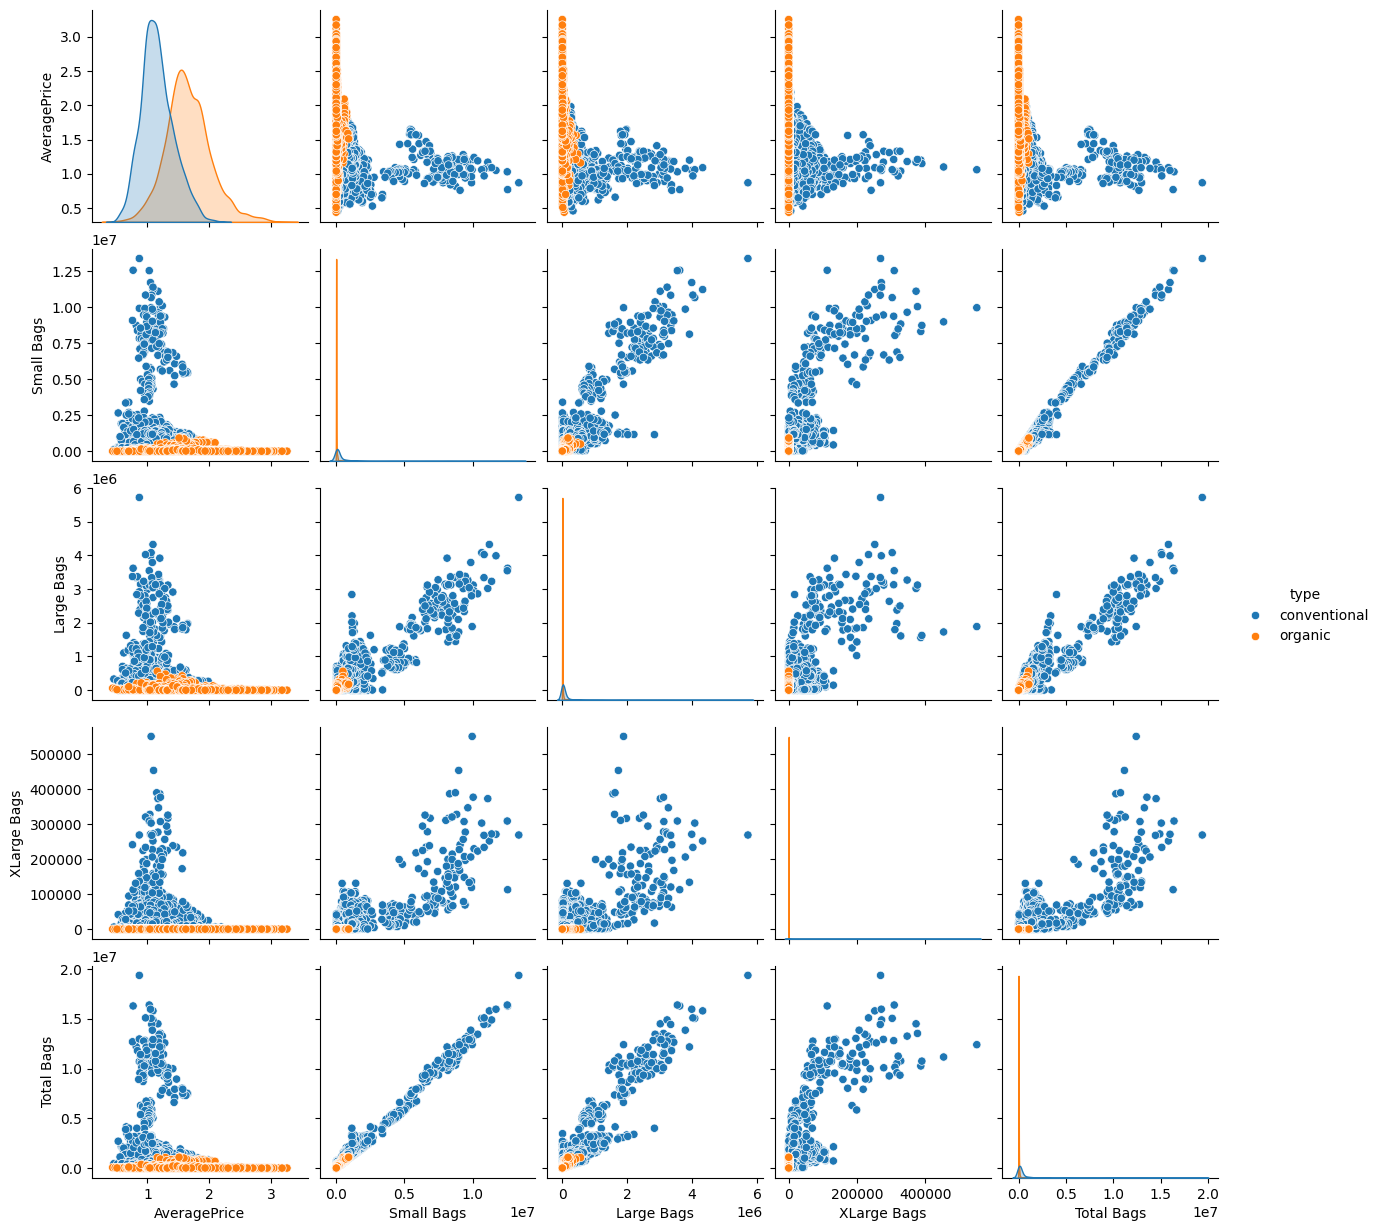

In [25]:
# Seleccionamos otro conjunto de columnas numéricas relevantes
columnas_seleccionadas = ["AveragePrice", "Small Bags", "Large Bags", "XLarge Bags", "Total Bags"]

# Creamos el pairplot con diferenciación por tipo de aguacate
sns.pairplot(df[columnas_seleccionadas + ["type"]], hue="type", diag_kind="kde")  
plt.show()

## limpieza y normalizacion

In [26]:
# Solo columnas numéricas
num_df = df.select_dtypes(include=np.number)

# Calcular Z-scores
z_scores = np.abs(stats.zscore(num_df, nan_policy='omit'))

# Umbral es 3
outliers = (z_scores > 3)

# Ver cuántos outliers hay por columna
outliers.sum(axis=0)




array([  0, 131, 171, 181, 180, 259, 187, 179, 251, 234,   0])

In [27]:
#matar outliers
df_cleaned = df[(z_scores <= 3).all(axis=1)]


In [28]:
#transformar date
df['Date'] = pd.to_datetime(df['Date'])  # convertir si aún no es datetime
df['month'] = df['Date'].dt.month
df[['Date', 'month']].head()



,Date,month
0,2015-12-27,12
1,2015-12-20,12
2,2015-12-13,12
3,2015-12-06,12
4,2015-11-29,11


## Agrupar datos por region año y mes

In [29]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df['type_organic'] = df['type_organic'].astype(int)

df_grouped = df.groupby(['region', 'year', 'month','type_organic']).mean(numeric_only=True).reset_index()
df_grouped.head()


,region,year,month,type_organic,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,Albany,2015,1,0,49.5,1.1725,42931.7850,1419.4675,31166.0600,119.2325,10227.0250,9744.3525,482.6725,0.0
1,Albany,2015,1,1,49.5,1.8450,1197.7175,29.8275,196.6250,0.0000,971.2650,971.2650,0.0000,0.0
2,Albany,2015,2,0,45.5,1.0275,52342.5600,1196.5775,41057.6625,178.9975,9909.3225,9565.9875,343.3350,0.0
3,Albany,2015,2,1,45.5,1.7625,1333.5025,23.6400,91.7200,0.0000,1218.1425,1218.1425,0.0000,0.0
4,Albany,2015,3,0,41.0,1.0620,50658.9640,1419.5020,39877.5860,134.3020,9227.5740,8852.8580,374.7160,0.0


In [30]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        4212 non-null   object 
 1   year          4212 non-null   int64  
 2   month         4212 non-null   int32  
 3   type_organic  4212 non-null   int64  
 4   index         4212 non-null   float64
 5   AveragePrice  4212 non-null   float64
 6   Total Volume  4212 non-null   float64
 7   4046          4212 non-null   float64
 8   4225          4212 non-null   float64
 9   4770          4212 non-null   float64
 10  Total Bags    4212 non-null   float64
 11  Small Bags    4212 non-null   float64
 12  Large Bags    4212 non-null   float64
 13  XLarge Bags   4212 non-null   float64
dtypes: float64(10), int32(1), int64(2), object(1)
memory usage: 444.4+ KB


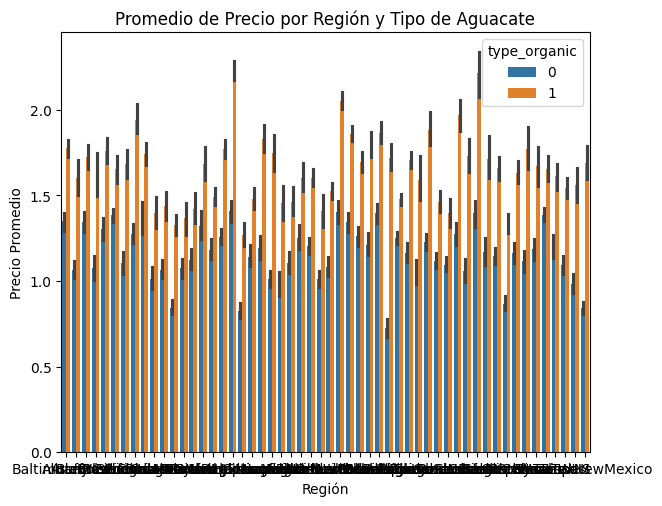

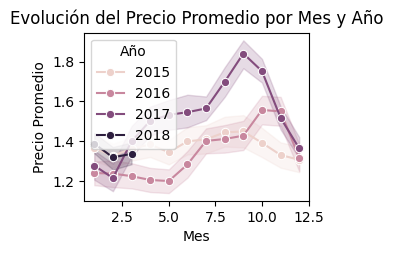

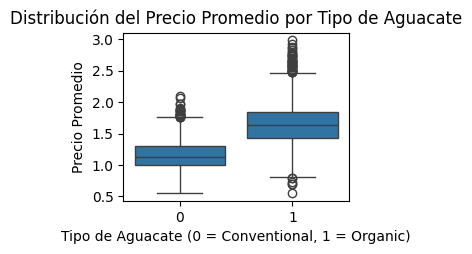

C:\Users\nicom\AppData\Local\Temp\ipykernel_9476\1500243870.py:36: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


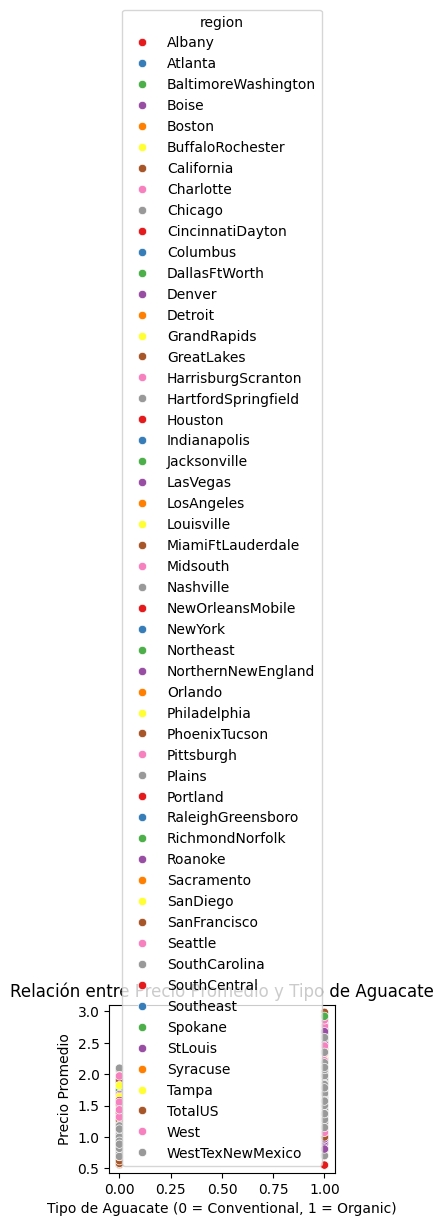

In [31]:

# Configurar el tamaño de la figura general
plt.figure(figsize=(15, 12))

# Gráfico 1: Precio promedio por región y tipo de aguacate
plt.subplot(2, 2, 1)  # 2 filas, 2 columnas, 1er gráfico
sns.barplot(x='region', y='AveragePrice', hue='type_organic', data=df_grouped)
plt.title('Promedio de Precio por Región y Tipo de Aguacate')
plt.xlabel('Región')
plt.ylabel('Precio Promedio')
plt.show()

# Gráfico 2: Evolución del precio promedio por mes y año
plt.subplot(2, 2, 2)  # 2 filas, 2 columnas, 2do gráfico
sns.lineplot(x='month', y='AveragePrice', hue='year', data=df_grouped, marker='o')
plt.title('Evolución del Precio Promedio por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio')
plt.legend(title='Año')
plt.show()
# Gráfico 3: Distribución del precio promedio por tipo de aguacate
plt.subplot(2, 2, 3)  # 2 filas, 2 columnas, 3er gráfico
sns.boxplot(x='type_organic', y='AveragePrice', data=df_grouped)
plt.title('Distribución del Precio Promedio por Tipo de Aguacate')
plt.xlabel('Tipo de Aguacate (0 = Conventional, 1 = Organic)')
plt.ylabel('Precio Promedio')
plt.show()

# Gráfico 4: Relación entre precio promedio y tipo de aguacate (scatterplot)
plt.subplot(2, 2, 4)  # 2 filas, 2 columnas, 4to gráfico
sns.scatterplot(x='type_organic', y='AveragePrice', data=df_grouped, hue='region', palette='Set1')
plt.title('Relación entre Precio Promedio y Tipo de Aguacate')
plt.xlabel('Tipo de Aguacate (0 = Conventional, 1 = Organic)')
plt.ylabel('Precio Promedio')

# Ajustar la disposición y mostrar todos los gráficos
plt.tight_layout()
plt.show()


## Regresion lineal


In [32]:
# separar X e y
# Definir variables predictoras (X) y variable objetivo (y)
X = df_grouped.drop(columns=['AveragePrice'])
y = df_grouped['AveragePrice']

# la region ahora seran numeros
# Convertir la columna 'region' a variables dummy
X = pd.get_dummies(X, columns=['region'], drop_first=True)

#normalizar x
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Separar en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo con X_train y y_train
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Crear DataFrame con los resultados
df_pred = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': y_test - y_pred
})

# Calcular el porcentaje de error
df_pred['porcentaje'] = (abs(df_pred['Error']) / df_pred['Actual']) * 100

# Asegurarnos que los valores negativos de Error sean positivos (ya lo hicimos con abs en Percentage_Error)
df_pred['Error'] = abs(df_pred['Error'])

# Mostrar la tabla con los resultados
df_pred




,Actual,Predicted,Error,porcentaje
643,1.7175,1.798547,0.081047,4.718911
166,1.1650,1.211106,0.046106,3.957639
1444,0.8175,0.840751,0.023251,2.844099
1877,1.7640,1.543387,0.220613,12.506398
463,1.1900,1.699466,0.509466,42.812300
...,...,...,...,...
3470,1.1175,1.189259,0.071759,6.421386
654,1.1050,1.255221,0.150221,13.594705
2578,0.6600,0.874337,0.214337,32.475336
1551,1.4575,1.737174,0.279674,19.188622


In [33]:
df_pred.describe()

,Actual,Predicted,Error,porcentaje
count,843.000000,843.000000,843.000000,843.000000
mean,1.398749,1.402477,0.172834,12.956105
std,0.386176,0.310547,0.148418,11.686914
min,0.562500,0.689087,0.000070,0.006139
25%,1.103250,1.150612,0.066743,4.670543
50%,1.357500,1.395278,0.140351,10.028797
75%,1.647750,1.636086,0.238108,17.374870
max,2.982500,2.245128,1.152676,78.041506


## Reduccion de dimensionalidad con PCA

In [ ]:
# Selección de variables
features = ['AveragePrice', 'Total Volume', '4046', '4225', '4770']
X = df[features]

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

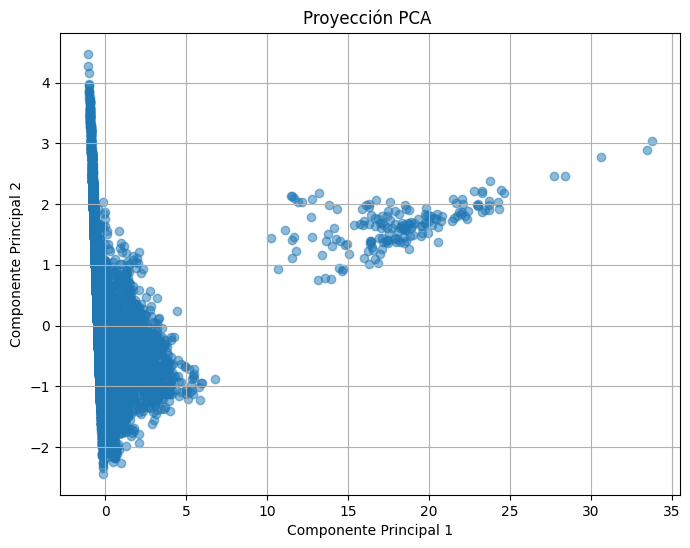

In [38]:
# Gráfico PCA 
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('Proyección PCA ')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

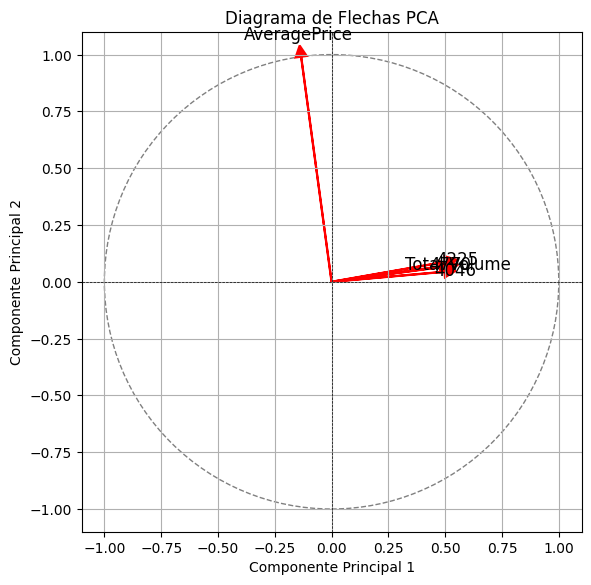

In [ ]:
# Paso 4: Diagrama de Flechas PCA 
plt.figure(figsize=(6, 6))
components = pca.components_.T  # Transpuesta para tener [n_features x 2]

# Círculo de referencia
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='dashed')
plt.gca().add_patch(circle)

# Flechas y nombres de variables
for i, (x, y) in enumerate(zip(components[:, 0], components[:, 1])):
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05,
              linewidth=1.5, color='red')
    plt.text(x * 1.1, y * 1.1, features[i],
             fontsize=12, color='black', ha='center', va='center')

# Estética del gráfico
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Diagrama de Flechas PCA")
plt.axhline(0, color='black', linestyle='dashed', linewidth=0.5)
plt.axvline(0, color='black', linestyle='dashed', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

In [ ]:
# Elegimos k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster_KMeans'] = clusters

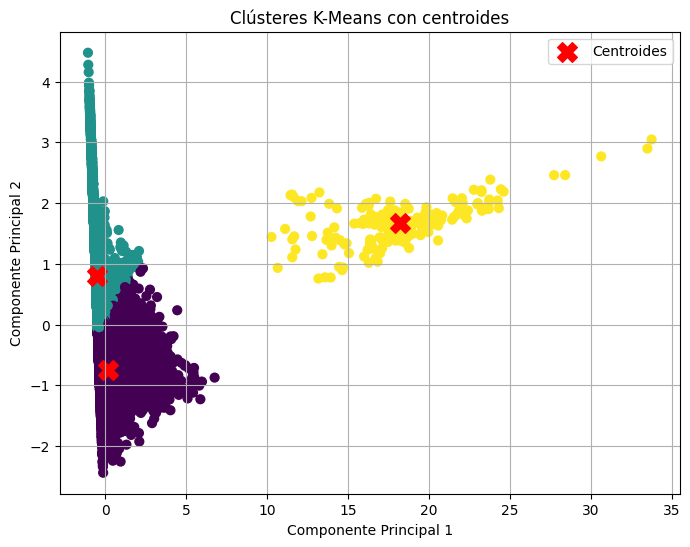

In [41]:
centroids = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clústeres K-Means con centroides')
plt.legend()
plt.grid(True)
plt.show()


### Caracteristicas de cada uno de los cluster

In [42]:
# Promedio de características por clúster
cluster_means = df.groupby('Cluster_KMeans')[features].mean()

El mapa de calor nos permitira notar rápidamente qué clúster tiene los valores más altos o bajos de ciertas características

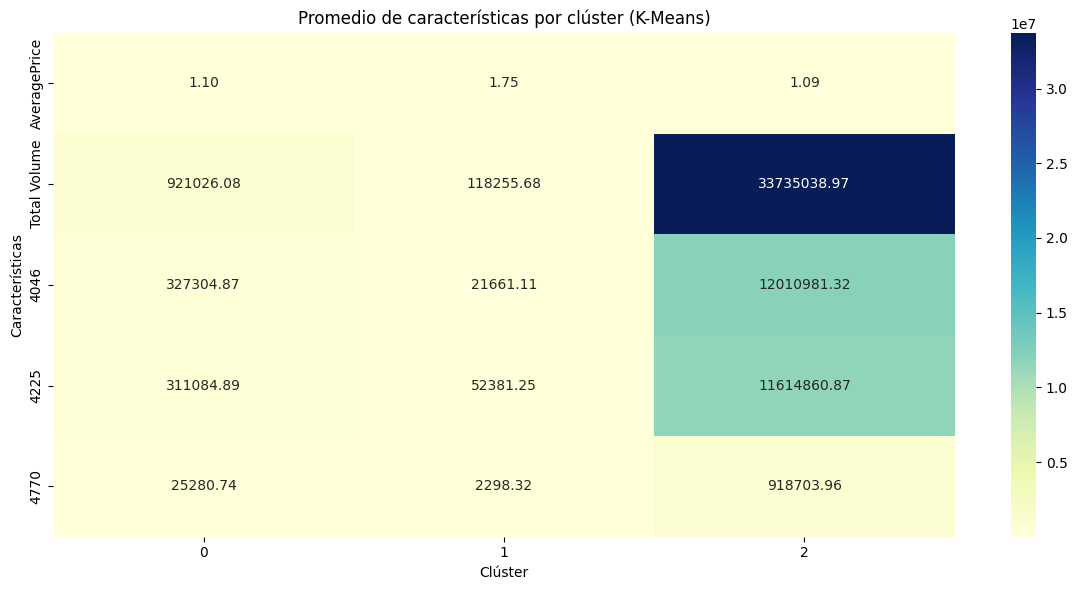

In [43]:
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Promedio de características por clúster (K-Means)")
plt.xlabel("Clúster")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

### Evaluacion del modelo

Silhouette Score	Cerca de 1 indica 	Buen agrupamiento

Davies-Bouldin Index	Cerca de 0	indica Buena separación

In [45]:
# Silhouette Score
silhouette = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette:.3f}")

# Davies-Bouldin Index
dbi = davies_bouldin_score(X_scaled, clusters)
print(f"Davies-Bouldin Index: {dbi:.3f}")

Silhouette Score: 0.451
Davies-Bouldin Index: 0.667


## Modelo GMM

In [46]:
# Aplicar GMM con el mismo número de clusters que usamos con KMeans
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Agregar los clusters al DataFrame
df['Cluster_GMM'] = gmm_labels

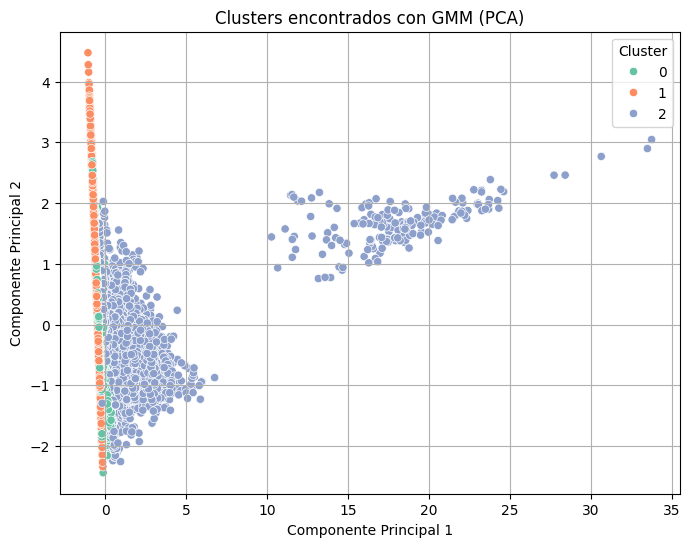

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=gmm_labels, palette='Set2')
plt.title("Clusters encontrados con GMM (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


### Evaluacion del modelo

In [48]:
print("Evaluación GMM:")
print(f"Silhouette Score: {silhouette_score(X_scaled, gmm_labels):.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled, gmm_labels):.3f}")

Evaluación GMM:
Silhouette Score: 0.128
Davies-Bouldin Index: 1.370


### Caracteristicas del modelo GMM

<Figure size 1000x600 with 0 Axes>

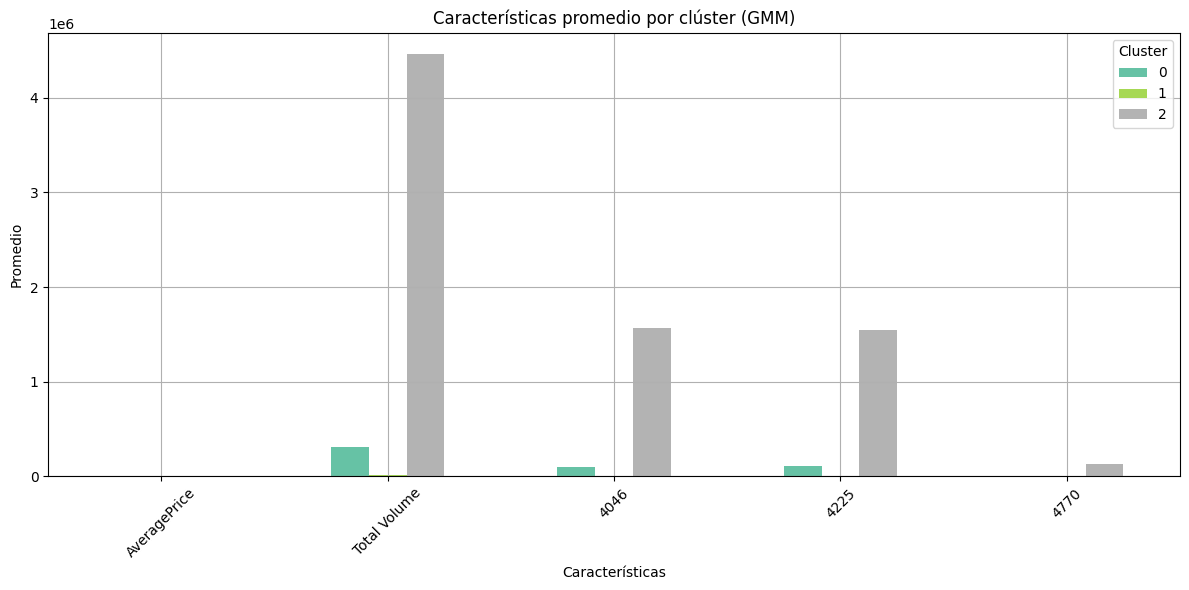

In [52]:
# Agrupar por cluster y obtener medias
gmm_characteristics = df.groupby('Cluster_GMM')[X.columns].mean()

# Barplot para comparar características promedio por cluster (GMM)
plt.figure(figsize=(10, 6))
gmm_characteristics.T.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Características promedio por clúster (GMM)")
plt.xlabel("Características")
plt.ylabel("Promedio")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Cluster")
plt.show()

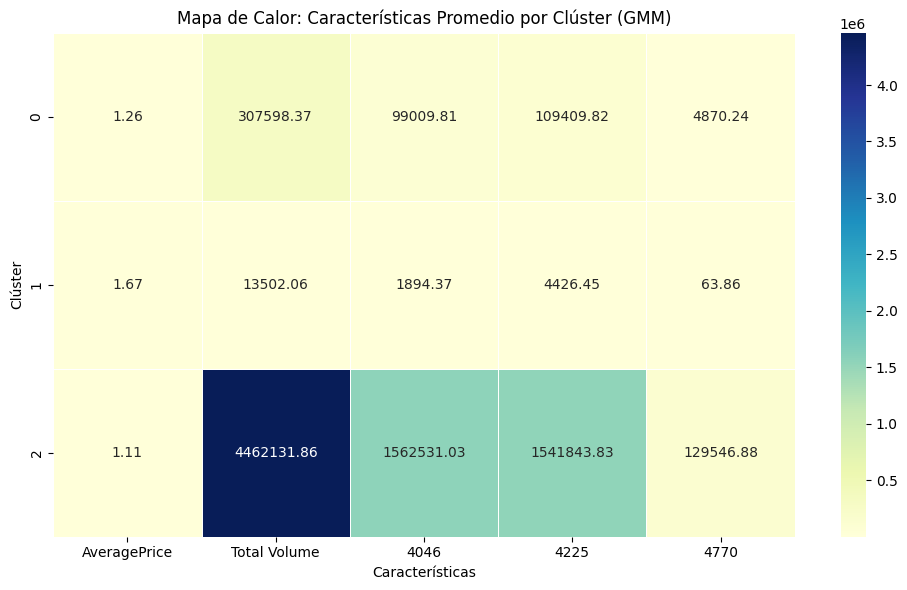

In [54]:
# Agrupar por clúster GMM y calcular la media de las características originales
gmm_means = df.groupby('Cluster_GMM')[X.columns].mean()

# Crear mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(gmm_means, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Mapa de Calor: Características Promedio por Clúster (GMM)")
plt.xlabel("Características")
plt.ylabel("Clúster")
plt.tight_layout()
plt.show()

## Modelo DBSCAN

In [49]:
# Ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Puedes ajustar eps y min_samples
dbscan_labels = dbscan.fit_predict(X_scaled)

# Agregar al DataFrame
df['Cluster_DBSCAN'] = dbscan_labels

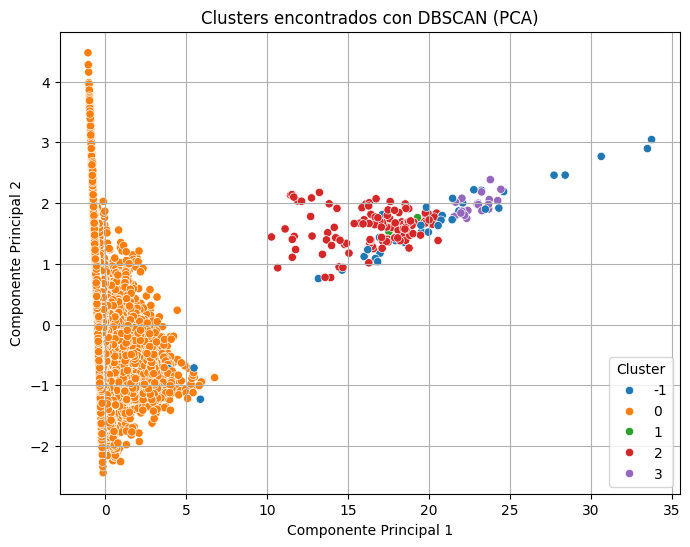

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='tab10')
plt.title("Clusters encontrados con DBSCAN (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


### Evaluacion del modelo

In [51]:
# Solo calcular si hay más de un clúster distinto de -1 (ruido)
if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
    silhouette = silhouette_score(X_scaled, dbscan_labels)
    dbi = davies_bouldin_score(X_scaled, dbscan_labels)
    print("Evaluación DBSCAN:")
    print(f"Silhouette Score: {silhouette:.3f}")
    print(f"Davies-Bouldin Index: {dbi:.3f}")
else:
    print("DBSCAN no encontró suficientes clústeres válidos para evaluar.")


Evaluación DBSCAN:
Silhouette Score: 0.907
Davies-Bouldin Index: 1.725


### Caracteristicas del modelo

<Figure size 1000x600 with 0 Axes>

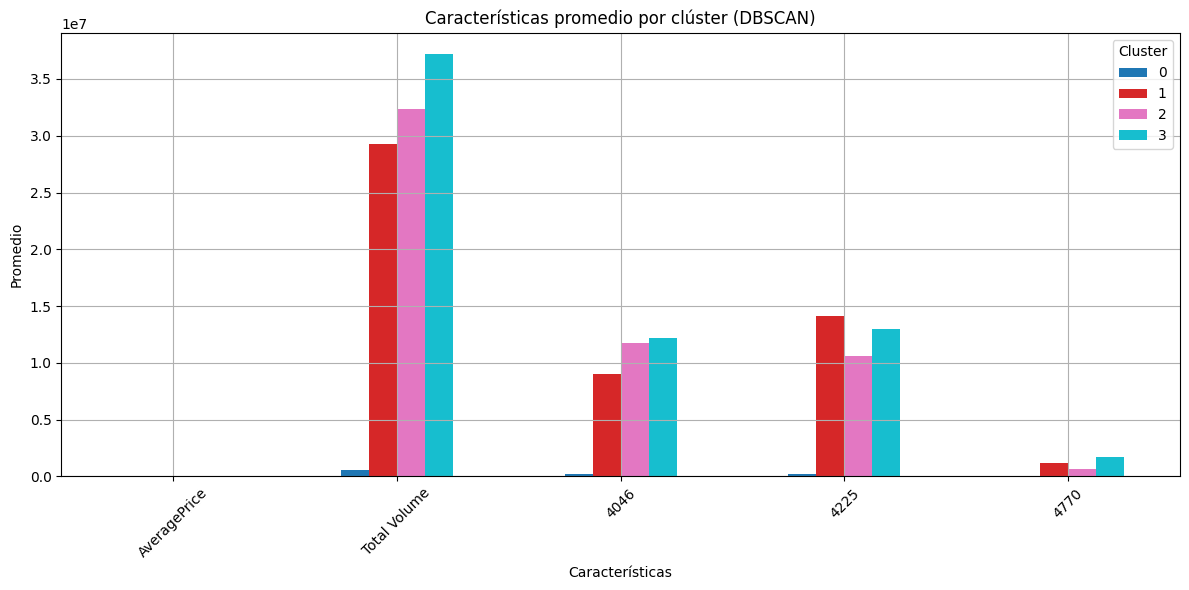

In [53]:
# Filtramos solo los puntos que no son ruido (-1)
df_dbscan_clean = df[df['Cluster_DBSCAN'] != -1]

# Agrupar por cluster y obtener medias
dbscan_characteristics = df_dbscan_clean.groupby('Cluster_DBSCAN')[X.columns].mean()

# Barplot para comparar características promedio por cluster (DBSCAN)
plt.figure(figsize=(10, 6))
dbscan_characteristics.T.plot(kind='bar', figsize=(12, 6), colormap='tab10')
plt.title("Características promedio por clúster (DBSCAN)")
plt.xlabel("Características")
plt.ylabel("Promedio")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Cluster")
plt.show()
